22H1120016 - Tr·∫ßn ƒêƒÉng Nam

Lab - nh·∫≠n di·ªán ch·ªØ k√Ω tay KNN v√† LogisticRegression

- Ma tr·∫≠n confusion matrix (l·∫ßn l∆∞·ª£t cho 2 m√¥ h√¨nh)

- M·ªôt v√†i m·∫´u nh·∫≠n d·∫°ng sai c·ªßa m√¥ h√¨nh n√†y nh∆∞ng ƒë√∫ng v·ªõi m√¥ h√¨nh kia (v√† ng∆∞·ª£c l·∫°i)

- M·ªôt v√†i m·∫´u nh·∫≠n d·∫°ng sai c·ªßa c·∫£ 2 m√¥ h√¨nh

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import warnings

In [2]:
# T·∫Øt c√°c c·∫£nh b√°o kh√¥ng c·∫ßn thi·∫øt (v√≠ d·ª•: ConvergenceWarning)
warnings.filterwarnings('ignore')

In [3]:
#1. Load dataset & standardize 
digits = datasets.load_digits()

print("Keys c·ªßa dataset:", digits.keys())
print("S·ªë l∆∞·ª£ng m·∫´u:", len(digits.data))
print(digits.data)
print(digits.data.shape)

print("S·ªë l∆∞·ª£ng features (pixel):", digits.data.shape[0]) 
print("S·ªë l∆∞·ª£ng l·ªõp (c√°c ch·ªØ s·ªë):", len(digits.target_names))
print("T√™n c√°c l·ªõp:", digits.target_names)
print(digits.feature_names)
print(digits.target)


Keys c·ªßa dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
S·ªë l∆∞·ª£ng m·∫´u: 1797
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
S·ªë l∆∞·ª£ng features (pixel): 1797
S·ªë l∆∞·ª£ng l·ªõp (c√°c ch·ªØ s·ªë): 10
T√™n c√°c l·ªõp: [0 1 2 3 4 5 6 7 8 9]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5

In [8]:
# Load data 
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # L√†m ph·∫≥ng ·∫£nh

# Digits.target = labels  - Split dataset 
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, random_state=42, stratify=digits.target
)

In [9]:
# Scale d·ªØ li·ªáu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw) # Fit v√† transform tr√™n t·∫≠p train
X_test = scaler.transform(X_test_raw)       # Ch·ªâ transform tr√™n t·∫≠p test

print("K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán (ƒë√£ scale):", X_train.shape, y_train.shape)
print("K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm tra (ƒë√£ scale):", X_test.shape, y_test.shape)
print("\nScaling ƒë√£ ƒë∆∞·ª£c √°p d·ª•ng.")


K√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán (ƒë√£ scale): (1257, 64) (1257,)
K√≠ch th∆∞·ªõc t·∫≠p ki·ªÉm tra (ƒë√£ scale): (540, 64) (540,)

Scaling ƒë√£ ƒë∆∞·ª£c √°p d·ª•ng.


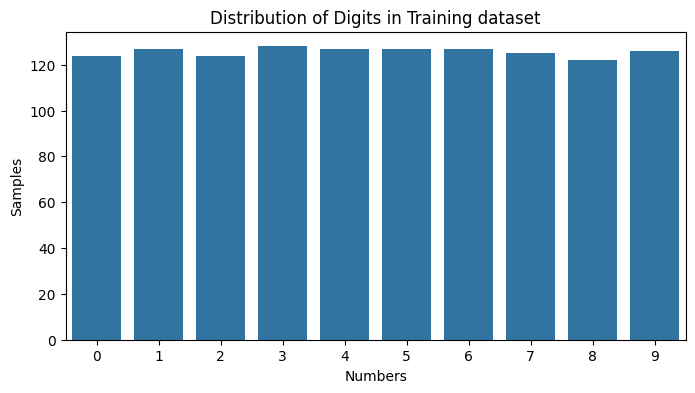

In [10]:
# 2.1 Ph√¢n ph·ªëi c√°c l·ªõp (Digits Distribution) - Histogram
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Distribution of Digits in Training dataset') 
plt.xlabel('Numbers')
plt.ylabel('Samples')
plt.show()

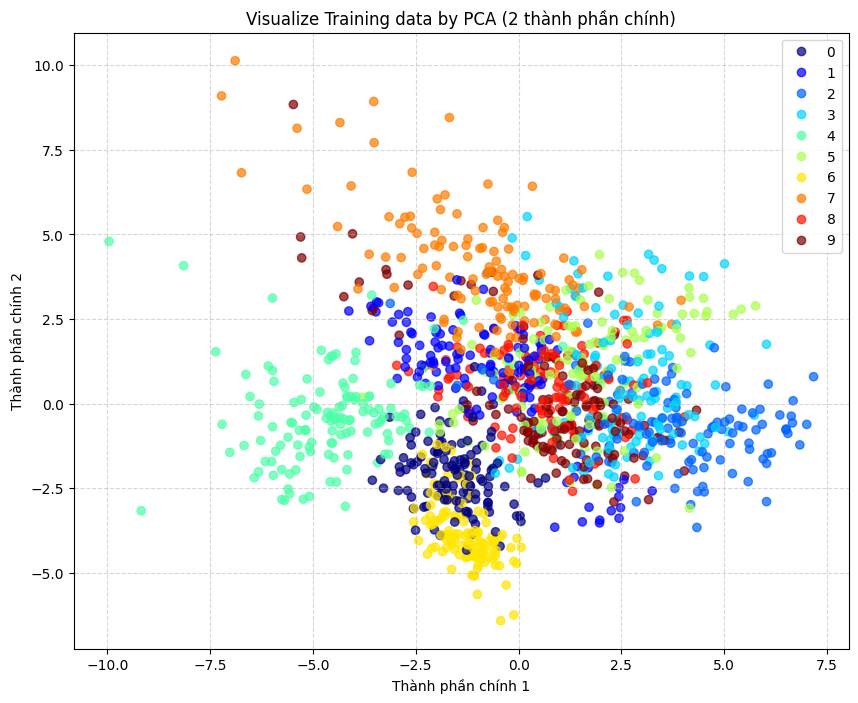

T·ª∑ l·ªá ph∆∞∆°ng sai ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi 2 th√†nh ph·∫ßn PCA: 0.220
Nh·∫≠n x√©t: PCA cho th·∫•y c√°c c·ª•m ch·ªØ s·ªë c√≥ xu h∆∞·ªõng t√°ch bi·ªát, nh∆∞ng v·∫´n c√≥ s·ª± ch·ªìng ch√©o ƒë√°ng k·ªÉ, ƒë·∫∑c bi·ªát l√† gi·ªØa c√°c s·ªë c√≥ h√¨nh d·∫°ng t∆∞∆°ng t·ª±.


In [11]:
# 2.2 Tr·ª±c quan h√≥a PCA (Principal Component Analysis)
# Gi·∫£m chi·ªÅu d·ªØ li·ªáu xu·ªëng 2 chi·ªÅu ƒë·ªÉ v·∫Ω ƒë·ªì th·ªã
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train) # Fit PCA tr√™n t·∫≠p train ƒë√£ scale


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.get_cmap("jet", 10), alpha=0.7)
plt.title('Visualize Training data by PCA (2 th√†nh ph·∫ßn ch√≠nh)')
plt.xlabel('Th√†nh ph·∫ßn ch√≠nh 1')
plt.ylabel('Th√†nh ph·∫ßn ch√≠nh 2')

# L·∫•y c·∫£ handles v√† labels ƒë∆∞·ª£c t·∫°o t·ª± ƒë·ªông t·ª´ scatter plot
# scatter.legend_elements() tr·∫£ v·ªÅ m·ªôt tuple g·ªìm 2 ph·∫ßn:
# - Ph·∫ßn th·ª© nh·∫•t l√† m·ªôt list c√°c handles (c√°c ƒë·ªëi t∆∞·ª£ng ƒë·ªÉ plot - marker)
# - Ph·∫ßn th·ª© hai l√† m·ªôt list c√°c labels (d·∫°ng string) t∆∞∆°ng ·ª©ng v·ªõi c√°c handles.

handles, legend_labels = scatter.legend_elements()

# S·ª≠ d·ª•ng handles v√† labels n√†y cho legend
plt.legend(handles=handles, labels=legend_labels)
# plt.legend(handles=scatter.legend_elements()[0], labels=digits.target_names) # d√≤ng code n√†y l·ªói 0 do labels "·ªü d·∫°ng numpy array" -> kh√¥ng ph√π h·ª£p


plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print(f"T·ª∑ l·ªá ph∆∞∆°ng sai ƒë∆∞·ª£c gi·∫£i th√≠ch b·ªüi 2 th√†nh ph·∫ßn PCA: {pca.explained_variance_ratio_.sum():.3f}")
print("Nh·∫≠n x√©t: PCA cho th·∫•y c√°c c·ª•m ch·ªØ s·ªë c√≥ xu h∆∞·ªõng t√°ch bi·ªát, nh∆∞ng v·∫´n c√≥ s·ª± ch·ªìng ch√©o ƒë√°ng k·ªÉ, ƒë·∫∑c bi·ªát l√† gi·ªØa c√°c s·ªë c√≥ h√¨nh d·∫°ng t∆∞∆°ng t·ª±.")



Gridsearch (refit) model -> find the best "hyper params"  üòÆüòÆüòÆ


How Gridsearch works:

1. V·ªõi m·ªói combination c·ªßa Gridsearch -> n√≥ th·ª±c hi·ªán cross-validation (5-fold trong code). 
=> chia X_train, y_train th√†nh 5 ph·∫ßn. V·ªõi (fold), train m·ªói fold KNN v·ªõi 4 fold - ch·ª´a 1 fold ƒë·ªÉ test (l·∫∑p l·∫°i 5 l·∫ßn)

2. D√πng ƒë·ªÉ t√≠nh (accuracy) qua 5 fold cho m·ªói gi√° tr·ªã k.


3. Hu·∫•n luy·ªán l·∫°i (Refit - ƒê√¢y l√† b∆∞·ªõc quan tr·ªçng):

a. Default (refit=True), sau khi t√¨m ra b·ªô tham s·ªë t·ªët nh·∫•t (best_params_), GridSearchCV s·∫Ω t·ª± ƒë·ªông hu·∫•n luy·ªán l·∫°i m·ªôt m√¥ h√¨nh KNN m·ªõi 

b. grid_search_knn.best_estimator_ (train l·∫°i model b·∫±ng best_params_) v·ª´a t√¨m -> L√Ä BEST MODEL 

c. Kh√¥ng c·∫ßn ph·∫£i train laij "KNeighborsClassifier" --> v√¨ ƒë√£ extract best model t·ª´ gridsearch 



Tham s·ªë t·ªët nh·∫•t cho KNN: {'n_neighbors': np.int64(1)}
ƒê·ªô ch√≠nh x√°c t·ªët nh·∫•t tr√™n t·∫≠p validation (cross-validation): 0.9721


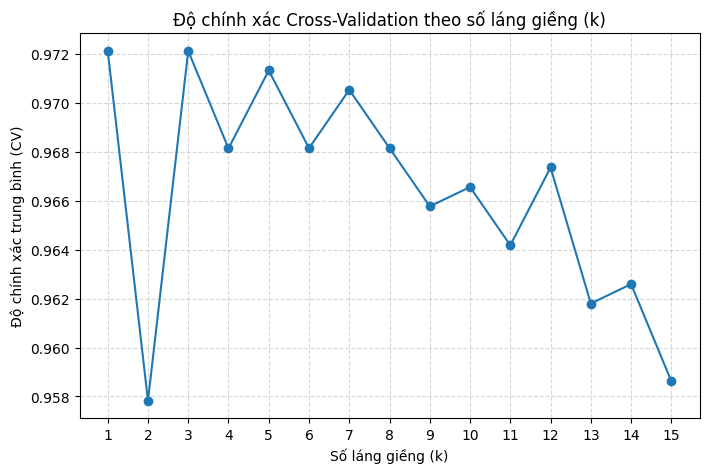

In [12]:
# 3. T·ªëi ∆∞u h√≥a v√† Hu·∫•n luy·ªán m√¥ h√¨nh KNN

# Declare m·ªôt GridSearchCV ƒë·ªÉ t√¨m k t·ªët nh·∫•t v·ªõi 5-fold cross-validation
param_grid_knn = {'n_neighbors': np.arange(1, 16)} # Th·ª≠ c√°c gi√° tr·ªã k t·ª´ 1 ƒë·∫øn 15

# Kh·ªüi t·∫°o KNN
knn = KNeighborsClassifier()

# S·ª≠ d·ª•ng GridSearchCV ƒë·ªÉ t√¨m k t·ªët nh·∫•t v·ªõi 5-fold cross-validation - find hyperparameters
grid_search_knn = GridSearchCV(
    knn, param_grid_knn, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1)

# Train model t√¨m k t·ªët nh·∫•t (ch∆∞a c√≥ train model th·ª±c t·∫ø ƒë√¢u)
grid_search_knn.fit(X_train, y_train)

# L·∫•y m√¥ h√¨nh KNN t·ªët nh·∫•t t·ª´ GridSearchCV -> kh√¥ng c·∫ßn train l·∫°i n·ªØa -> l·∫•y tr·ª±c ti·∫øp t·ª´ grid_search_knn
best_knn = grid_search_knn.best_estimator_
print(f"Tham s·ªë t·ªët nh·∫•t cho KNN: {grid_search_knn.best_params_}")
print(f"ƒê·ªô ch√≠nh x√°c t·ªët nh·∫•t tr√™n t·∫≠p validation (cross-validation): {grid_search_knn.best_score_:.4f}")

# Tr·ª±c quan h√≥a k·∫øt qu·∫£ Grid Search cho KNN
plt.figure(figsize=(8, 5))
plt.plot(param_grid_knn['n_neighbors'], grid_search_knn.cv_results_['mean_test_score'], marker='o')
plt.title('ƒê·ªô ch√≠nh x√°c Cross-Validation theo s·ªë l√°ng gi·ªÅng (k)')
plt.xlabel('S·ªë l√°ng gi·ªÅng (k)')
plt.ylabel('ƒê·ªô ch√≠nh x√°c trung b√¨nh (CV)')
plt.xticks(param_grid_knn['n_neighbors'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [13]:
# 4. ƒê√°nh gi√° m√¥ h√¨nh KNN t·ªëi ∆∞u

# D·ª± ƒëo√°n tr√™n t·∫≠p test b·∫±ng m√¥ h√¨nh KNN t·ªët nh·∫•t
y_pred_knn_best = best_knn.predict(X_test)

# ƒê√°nh gi√°
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)
print(f"ƒê·ªô ch√≠nh x√°c (Accuracy) c·ªßa KNN t·ªëi ∆∞u tr√™n t·∫≠p test: {accuracy_knn_best:.4f}")

print("\nB√°o c√°o ph√¢n lo·∫°i chi ti·∫øt cho KNN t·ªëi ∆∞u:")
print(classification_report(y_test, y_pred_knn_best, target_names=[str(i) for i in digits.target_names]))

cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)


ƒê·ªô ch√≠nh x√°c (Accuracy) c·ªßa KNN t·ªëi ∆∞u tr√™n t·∫≠p test: 0.9741

B√°o c√°o ph√¢n lo·∫°i chi ti·∫øt cho KNN t·ªëi ∆∞u:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.98      0.96        55
           2       0.98      0.96      0.97        53
           3       0.96      1.00      0.98        55
           4       0.96      0.96      0.96        54
           5       1.00      0.98      0.99        55
           6       0.98      1.00      0.99        54
           7       0.96      1.00      0.98        54
           8       0.96      0.90      0.93        52
           9       0.98      0.94      0.96        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [14]:
# 5. T·ªëi ∆∞u h√≥a v√† Hu·∫•n luy·ªán m√¥ h√¨nh Logistic Regression

# 'C' l√† ngh·ªãch ƒë·∫£o c·ªßa ƒë·ªô m·∫°nh regularization (C nh·ªè -> regularization m·∫°nh h∆°n)
# 'solver': m·ªôt s·ªë solver ch·ªâ ho·∫°t ƒë·ªông v·ªõi penalty nh·∫•t ƒë·ªãnh ('liblinear' cho l1/l2, 'lbfgs', 'saga' cho l2/none)
# 'saga' th∆∞·ªùng t·ªët cho dataset l·ªõn v√† h·ªó tr·ª£ nhi·ªÅu lo·∫°i penalty

param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], # Ch·ªâ d√πng l2 cho ƒë∆°n gi·∫£n, 'lbfgs' l√† m·∫∑c ƒë·ªãnh v√† hi·ªáu qu·∫£
    'solver': ['lbfgs'] # Solver m·∫∑c ƒë·ªãnh, th∆∞·ªùng ho·∫°t ƒë·ªông t·ªët
    # N·∫øu mu·ªën th·ª≠ l1: 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']
}

# Kh·ªüi t·∫°o Logistic Regression
logreg = LogisticRegression(max_iter=5000, random_state=42, multi_class='auto') # multi_class='auto' t·ª± ch·ªçn chi·∫øn l∆∞·ª£c ph√π h·ª£p

# S·ª≠ d·ª•ng GridSearchCV
print("\nB·∫Øt ƒë·∫ßu t√¨m hyperparams cho Logistic Regression...")
grid_search_logreg = GridSearchCV(
    logreg, 
    param_grid_logreg, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1)

grid_search_logreg.fit(X_train, y_train)

# L·∫•y m√¥ h√¨nh Logistic Regression t·ªët nh·∫•t
best_logreg = grid_search_logreg.best_estimator_
print(f"Tham s·ªë t·ªët nh·∫•t cho Logistic Regression: {grid_search_logreg.best_params_}")
print(f"ƒê·ªô ch√≠nh x√°c t·ªët nh·∫•t tr√™n t·∫≠p validation (cross-validation): {grid_search_logreg.best_score_:.4f}")




B·∫Øt ƒë·∫ßu t√¨m hyperparams cho Logistic Regression...
Tham s·ªë t·ªët nh·∫•t cho Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
ƒê·ªô ch√≠nh x√°c t·ªët nh·∫•t tr√™n t·∫≠p validation (cross-validation): 0.9658


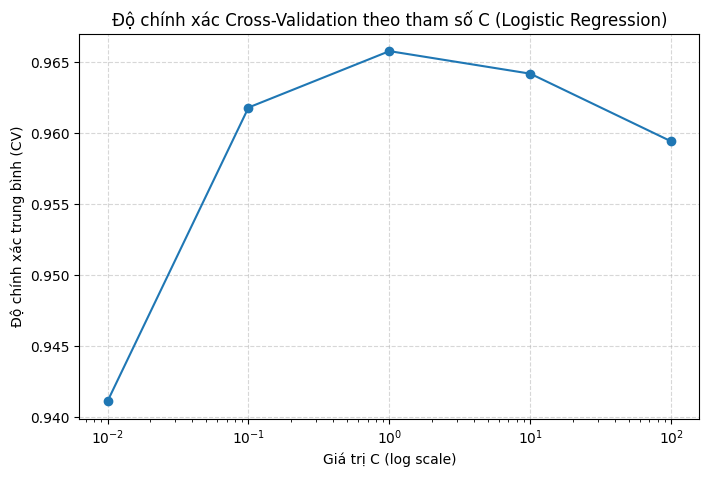

In [15]:
# Tr·ª±c quan h√≥a k·∫øt qu·∫£ Grid Search cho LogReg (theo C)
results_logreg = grid_search_logreg.cv_results_
c_values = [params['C'] for params in results_logreg['params']]
mean_scores = results_logreg['mean_test_score']

plt.figure(figsize=(8, 5))
plt.semilogx(c_values, mean_scores, marker='o') # D√πng tr·ª•c log cho C
plt.title('ƒê·ªô ch√≠nh x√°c Cross-Validation theo tham s·ªë C (Logistic Regression)')
plt.xlabel('Gi√° tr·ªã C (log scale)')
plt.ylabel('ƒê·ªô ch√≠nh x√°c trung b√¨nh (CV)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [16]:
# 6. ƒê√°nh gi√° m√¥ h√¨nh Logistic Regression t·ªëi ∆∞u

# D·ª± ƒëo√°n tr√™n t·∫≠p test b·∫±ng m√¥ h√¨nh LogReg t·ªët nh·∫•t
y_pred_logreg_best = best_logreg.predict(X_test)

# ƒê√°nh gi√°
accuracy_logreg_best = accuracy_score(y_test, y_pred_logreg_best)
print(f"ƒê·ªô ch√≠nh x√°c (Accuracy) c·ªßa Logistic Regression t·ªëi ∆∞u tr√™n t·∫≠p test: {accuracy_logreg_best:.4f}")

print("\nB√°o c√°o ph√¢n lo·∫°i chi ti·∫øt cho Logistic Regression t·ªëi ∆∞u:")
print(classification_report(y_test, y_pred_logreg_best, target_names=[str(i) for i in digits.target_names]))

cm_logreg_best = confusion_matrix(y_test, y_pred_logreg_best)

ƒê·ªô ch√≠nh x√°c (Accuracy) c·ªßa Logistic Regression t·ªëi ∆∞u tr√™n t·∫≠p test: 0.9815

B√°o c√°o ph√¢n lo·∫°i chi ti·∫øt cho Logistic Regression t·ªëi ∆∞u:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.95      0.95      0.95        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       0.98      0.98      0.98        54
           5       1.00      0.98      0.99        55
           6       1.00      0.98      0.99        54
           7       1.00      1.00      1.00        54
           8       0.91      0.94      0.92        52
           9       0.98      0.98      0.98        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [17]:
# 7. So s√°nh k·∫øt qu·∫£ hai m√¥ h√¨nh t·ªëi ∆∞u

print("--- So S√°nh Hi·ªáu NƒÉng (Sau T·ªëi ∆Øu H√≥a) ---")
print(f"KNN T·ªëi ∆Øu Accuracy:                 {accuracy_knn_best:.4f}")
print(f"Logistic Regression T·ªëi ∆Øu Accuracy: {accuracy_logreg_best:.4f}")

if accuracy_knn_best > accuracy_logreg_best:
    print("\nM√¥ h√¨nh KNN t·ªëi ∆∞u c√≥ ƒë·ªô ch√≠nh x√°c cao h∆°n tr√™n t·∫≠p ki·ªÉm tra.")
elif accuracy_logreg_best > accuracy_knn_best:
    print("\nM√¥ h√¨nh Logistic Regression t·ªëi ∆∞u c√≥ ƒë·ªô ch√≠nh x√°c cao h∆°n tr√™n t·∫≠p ki·ªÉm tra.")
else:
    print("\nHai m√¥ h√¨nh t·ªëi ∆∞u c√≥ ƒë·ªô ch√≠nh x√°c b·∫±ng nhau tr√™n t·∫≠p ki·ªÉm tra.")




--- So S√°nh Hi·ªáu NƒÉng (Sau T·ªëi ∆Øu H√≥a) ---
KNN T·ªëi ∆Øu Accuracy:                 0.9741
Logistic Regression T·ªëi ∆Øu Accuracy: 0.9815

M√¥ h√¨nh Logistic Regression t·ªëi ∆∞u c√≥ ƒë·ªô ch√≠nh x√°c cao h∆°n tr√™n t·∫≠p ki·ªÉm tra.


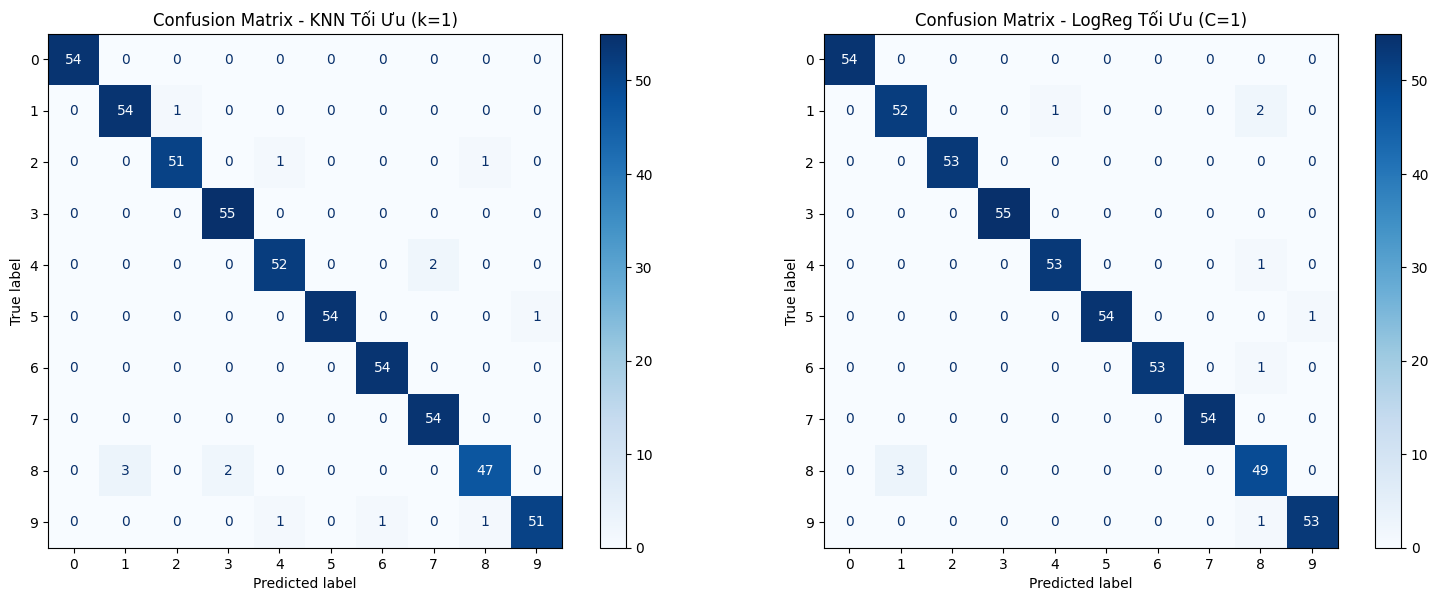

In [18]:
# 8. Tr·ª±c quan h√≥a Confusion Matrix (cho m√¥ h√¨nh t·ªëi ∆∞u)

# V·∫Ω confusion matrix cho c·∫£ hai m√¥ h√¨nh T·ªêI ∆ØU
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix cho KNN t·ªëi ∆∞u
disp_knn_best = ConfusionMatrixDisplay(confusion_matrix=cm_knn_best, display_labels=digits.target_names)
disp_knn_best.plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title(f'Confusion Matrix - KNN T·ªëi ∆Øu (k={best_knn.n_neighbors})')

# Confusion Matrix cho Logistic Regression t·ªëi ∆∞u
disp_logreg_best = ConfusionMatrixDisplay(confusion_matrix=cm_logreg_best, display_labels=digits.target_names)
disp_logreg_best.plot(ax=axes[1], cmap=plt.cm.Blues)
axes[1].set_title(f'Confusion Matrix - LogReg T·ªëi ∆Øu (C={best_logreg.C})')

plt.tight_layout()
plt.show()

In [19]:
# 9. Ph√¢n t√≠ch v√† tr·ª±c quan h√≥a c√°c m·∫´u nh·∫≠n d·∫°ng sai (cho m√¥ h√¨nh t·ªëi ∆∞u)


# T√¨m c√°c ch·ªâ s·ªë l·ªói cho m√¥ h√¨nh T·ªêI ∆ØU
knn_correct_best = (y_test == y_pred_knn_best)
logreg_correct_best = (y_test == y_pred_logreg_best)

# L·ªói KNN nh∆∞ng LogReg ƒë√∫ng
knn_wrong_logreg_right_indices_best = np.where(~knn_correct_best & logreg_correct_best)[0]
# L·ªói LogReg nh∆∞ng KNN ƒë√∫ng
logreg_wrong_knn_right_indices_best = np.where(knn_correct_best & ~logreg_correct_best)[0]
# C·∫£ hai c√πng l·ªói
both_wrong_indices_best = np.where(~knn_correct_best & ~logreg_correct_best)[0]

print(f"S·ªë m·∫´u KNN t·ªëi ∆∞u sai, LogReg t·ªëi ∆∞u ƒë√∫ng: {len(knn_wrong_logreg_right_indices_best)}")
print(f"S·ªë m·∫´u LogReg t·ªëi ∆∞u sai, KNN t·ªëi ∆∞u ƒë√∫ng: {len(logreg_wrong_knn_right_indices_best)}")
print(f"S·ªë m·∫´u c·∫£ hai m√¥ h√¨nh t·ªëi ∆∞u c√πng sai:     {len(both_wrong_indices_best)}")


S·ªë m·∫´u KNN t·ªëi ∆∞u sai, LogReg t·ªëi ∆∞u ƒë√∫ng: 9
S·ªë m·∫´u LogReg t·ªëi ∆∞u sai, KNN t·ªëi ∆∞u ƒë√∫ng: 5
S·ªë m·∫´u c·∫£ hai m√¥ h√¨nh t·ªëi ∆∞u c√πng sai:     5


In [20]:
# H√†m tr·ª£ plot (s·ª≠ d·ª•ng l·∫°i h√†m c≈©, nh∆∞ng v·ªõi d·ª± ƒëo√°n m·ªõi)
# ƒê·∫£m b·∫£o h√†m plot_misclassified_samples ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a ·ªü cell tr∆∞·ªõc ƒë√≥

def plot_misclassified_samples_optimized(indices, title, max_samples=8):
    """V·∫Ω c√°c ·∫£nh b·ªã ph√¢n lo·∫°i sai b·ªüi c√°c m√¥ h√¨nh T·ªêI ∆ØU."""
    if len(indices) == 0:
        print(f"Kh√¥ng c√≥ m·∫´u n√†o cho tr∆∞·ªùng h·ª£p: {title}")
        return

    sample_indices = indices[:min(len(indices), max_samples)]
    num_samples = len(sample_indices)
    num_cols = min(num_samples, 4)
    num_rows = (num_samples + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 1.5, num_rows * 3 )) # TƒÉng chi·ªÅu cao m·ªôt ch√∫t
    if num_rows == 1 and num_cols == 1: axes = np.array([[axes]])
    elif num_rows == 1: axes = axes.reshape(1, -1)
    elif num_cols == 1: axes = axes.reshape(-1, 1)

    fig.suptitle(title, fontsize=14)

    for i, test_idx in enumerate(sample_indices):
        row, col = divmod(i, num_cols)
        ax = axes[row, col]
        # L·∫•y ·∫£nh g·ªëc ch∆∞a scale ƒë·ªÉ hi·ªÉn th·ªã
        image = X_test_raw[test_idx].reshape(8, 8)
        true_label = y_test[test_idx]
        knn_pred = y_pred_knn_best[test_idx]
        logreg_pred = y_pred_logreg_best[test_idx]

        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title(f"True: {true_label}\nKNN*: {knn_pred}, LR*: {logreg_pred}") # ƒê√°nh d·∫•u * cho m√¥ h√¨nh t·ªëi ∆∞u
        ax.set_axis_off()

    for i in range(num_samples, num_rows * num_cols):
         row, col = divmod(i, num_cols)
         if row < axes.shape[0] and col < axes.shape[1]:
            axes[row, col].set_axis_off()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()



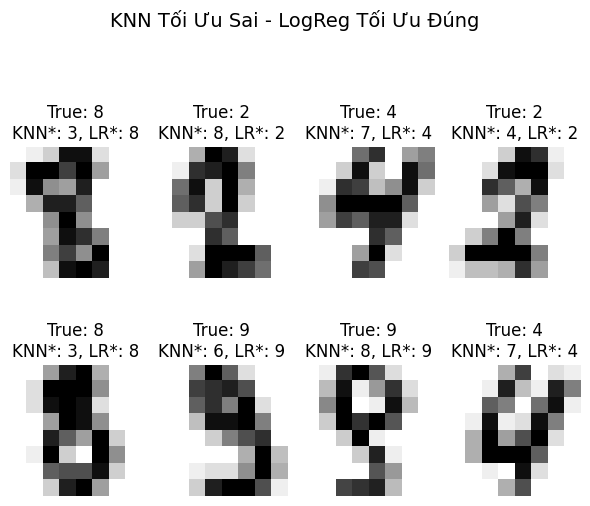

In [21]:
# 9.1 M·∫´u KNN t·ªëi ∆∞u sai, Logistic Regression t·ªëi ∆∞u ƒë√∫ng
plot_misclassified_samples_optimized(knn_wrong_logreg_right_indices_best, "KNN T·ªëi ∆Øu Sai - LogReg T·ªëi ∆Øu ƒê√∫ng")


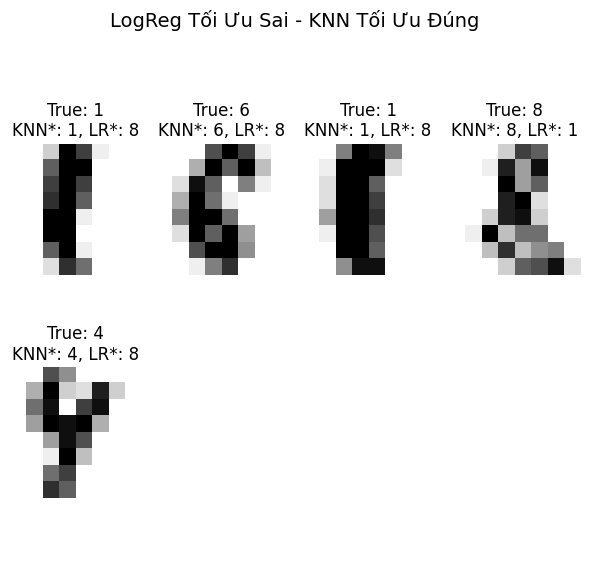

In [22]:
# 9.2 M·∫´u Logistic Regression t·ªëi ∆∞u sai, KNN t·ªëi ∆∞u ƒë√∫ng
plot_misclassified_samples_optimized(logreg_wrong_knn_right_indices_best, "LogReg T·ªëi ∆Øu Sai - KNN T·ªëi ∆Øu ƒê√∫ng")



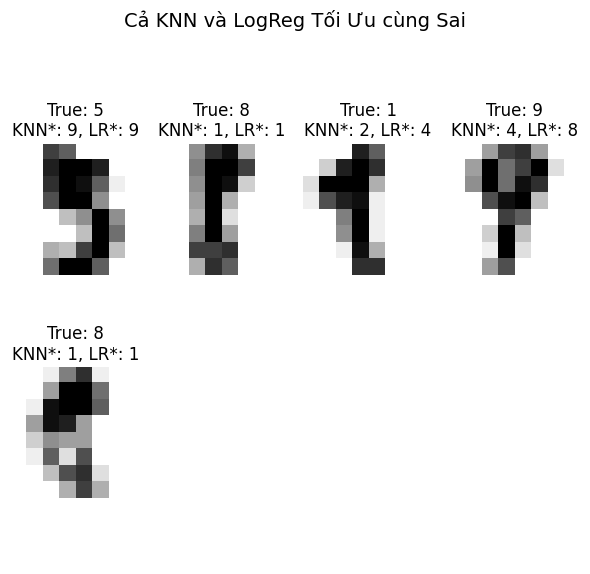

In [23]:
# 9.3 M·∫´u c·∫£ hai m√¥ h√¨nh t·ªëi ∆∞u c√πng nh·∫≠n d·∫°ng sai
plot_misclassified_samples_optimized(both_wrong_indices_best, "C·∫£ KNN v√† LogReg T·ªëi ∆Øu c√πng Sai")

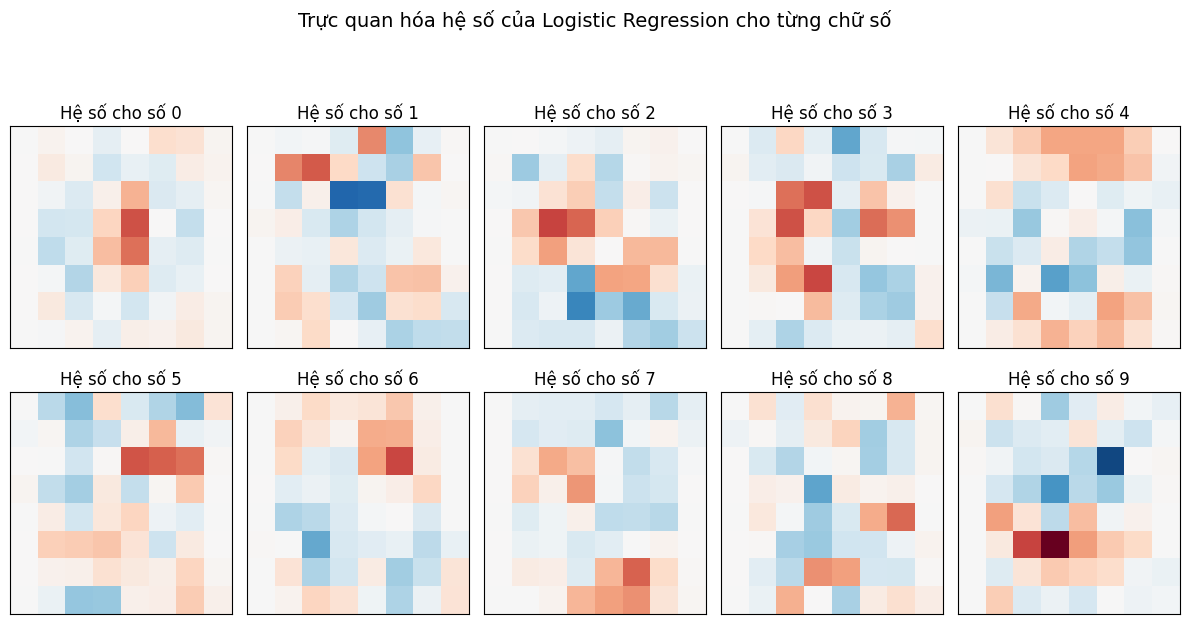

Nh·∫≠n x√©t: M√†u ƒë·ªè cho bi·∫øt pixel ƒë√≥ c√≥ tr·ªçng s·ªë d∆∞∆°ng (quan tr·ªçng ƒë·ªÉ nh·∫≠n di·ªán s·ªë ƒë√≥), m√†u xanh d∆∞∆°ng l√† tr·ªçng s·ªë √¢m (quan tr·ªçng ƒë·ªÉ lo·∫°i tr·ª´ s·ªë ƒë√≥). C√≥ th·ªÉ th·∫•y m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c h√¨nh d·∫°ng c∆° b·∫£n c·ªßa c√°c ch·ªØ s·ªë.


In [24]:
# 10. Tr·ª±c quan h√≥a b·ªï sung (Th√™m)
# 10.1 H·ªá s·ªë (Coefficients) c·ªßa Logistic Regression
# C√°c h·ªá s·ªë n√†y cho bi·∫øt t·∫ßm quan tr·ªçng c·ªßa m·ªói pixel ƒë·ªëi v·ªõi vi·ªác ph√¢n lo·∫°i t·ª´ng ch·ªØ s·ªë (trong chi·∫øn l∆∞·ª£c one-vs-rest ho·∫∑c multinomial). Gi√° tr·ªã d∆∞∆°ng l·ªõn cho bi·∫øt pixel ƒë√≥ b·∫≠t s√°ng th√¨ kh·∫£ nƒÉng l√† ch·ªØ s·ªë ƒë√≥ cao, gi√° tr·ªã √¢m l·ªõn th√¨ ng∆∞·ª£c l·∫°i.

# L·∫•y c√°c h·ªá s·ªë t·ª´ m√¥ h√¨nh Logistic Regression t·ªët nh·∫•t
coefs = best_logreg.coef_

# V·∫Ω heatmap cho c√°c h·ªá s·ªë c·ªßa t·ª´ng l·ªõp
plt.figure(figsize=(12, 7))
scale = np.abs(coefs).max() # D√πng ƒë·ªÉ chu·∫©n h√≥a m√†u s·∫Øc
for i in range(len(digits.target_names)):
    plt.subplot(2, 5, i + 1) # 2 h√†ng, 5 c·ªôt
    plt.imshow(coefs[i].reshape(8, 8), cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    plt.title(f'H·ªá s·ªë cho s·ªë {i}')
    plt.xticks(())
    plt.yticks(())

plt.suptitle('Tr·ª±c quan h√≥a h·ªá s·ªë c·ªßa Logistic Regression cho t·ª´ng ch·ªØ s·ªë', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("Nh·∫≠n x√©t: M√†u ƒë·ªè cho bi·∫øt pixel ƒë√≥ c√≥ tr·ªçng s·ªë d∆∞∆°ng (quan tr·ªçng ƒë·ªÉ nh·∫≠n di·ªán s·ªë ƒë√≥), m√†u xanh d∆∞∆°ng l√† tr·ªçng s·ªë √¢m (quan tr·ªçng ƒë·ªÉ lo·∫°i tr·ª´ s·ªë ƒë√≥). C√≥ th·ªÉ th·∫•y m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c h√¨nh d·∫°ng c∆° b·∫£n c·ªßa c√°c ch·ªØ s·ªë.")


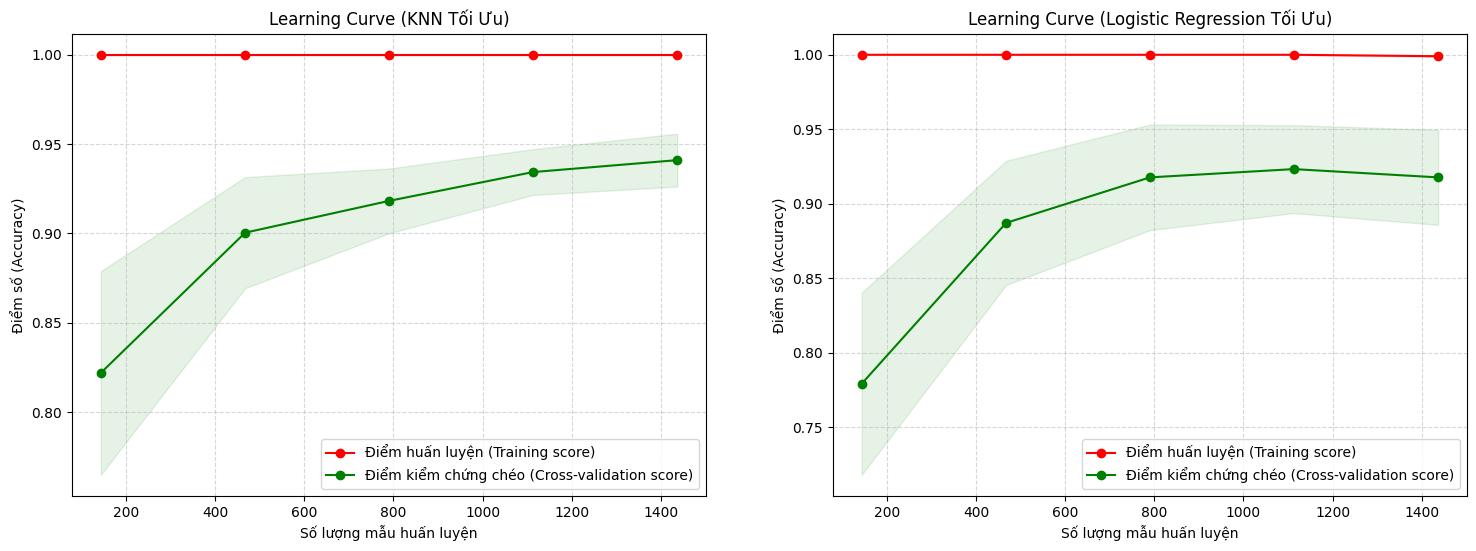

Nh·∫≠n x√©t Learning Curves:
- C·∫£ hai m√¥ h√¨nh ƒë·ªÅu cho th·∫•y ƒëi·ªÉm hu·∫•n luy·ªán (m√†u ƒë·ªè) cao v√† ƒëi·ªÉm cross-validation (m√†u xanh) c≈©ng kh√° cao v√† g·∫ßn v·ªõi ƒëi·ªÉm hu·∫•n luy·ªán khi d√πng nhi·ªÅu d·ªØ li·ªáu h∆°n.
- Kho·∫£ng c√°ch nh·ªè gi·ªØa hai ƒë∆∞·ªùng cong cho th·∫•y m√¥ h√¨nh kh√¥ng b·ªã overfitting qu√° nghi√™m tr·ªçng.
- ƒêi·ªÉm s·ªë tr√™n validation c√≥ xu h∆∞·ªõng ƒëi ngang khi tƒÉng d·ªØ li·ªáu, cho th·∫•y vi·ªác th√™m d·ªØ li·ªáu t∆∞∆°ng t·ª± c√≥ th·ªÉ kh√¥ng c·∫£i thi·ªán hi·ªáu nƒÉng nhi·ªÅu n·ªØa v·ªõi c√°c m√¥ h√¨nh n√†y. C√≥ th·ªÉ c·∫ßn m√¥ h√¨nh ph·ª©c t·∫°p h∆°n ho·∫∑c feature engineering ƒë·ªÉ c·∫£i thi·ªán th√™m.


In [25]:
# 10.2 Learning Curves (ƒê∆∞·ªùng cong h·ªçc)
# Learning curves cho th·∫•y hi·ªáu nƒÉng c·ªßa m√¥ h√¨nh (tr√™n t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p validation) thay ƒë·ªïi nh∆∞ th·∫ø n√†o khi tƒÉng k√≠ch th∆∞·ªõc t·∫≠p hu·∫•n luy·ªán. N√≥ gi√∫p ch·∫©n ƒëo√°n overfitting (kho·∫£ng c√°ch l·ªõn gi·ªØa 2 ƒë∆∞·ªùng) ho·∫∑c underfitting (c·∫£ 2 ƒë∆∞·ªùng ƒë·ªÅu th·∫•p).

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """V·∫Ω learning curve cho m·ªôt estimator."""
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 6))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("S·ªë l∆∞·ª£ng m·∫´u hu·∫•n luy·ªán")
    axes.set_ylabel("ƒêi·ªÉm s·ªë (Accuracy)")

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring="accuracy")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # V·∫Ω v√πng th·ªÉ hi·ªán ƒë·ªô l·ªách chu·∫©n
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")

    # V·∫Ω ƒë∆∞·ªùng trung b√¨nh
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="ƒêi·ªÉm hu·∫•n luy·ªán (Training score)")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="ƒêi·ªÉm ki·ªÉm ch·ª©ng ch√©o (Cross-validation score)")
    axes.legend(loc="best")
    axes.grid(True, linestyle='--', alpha=0.5)

    return plt

# V·∫Ω Learning Curve cho KNN t·ªëi ∆∞u v√† Logistic Regression t·ªëi ∆∞u
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# S·ª≠ d·ª•ng to√†n b·ªô d·ªØ li·ªáu X (ƒë√£ scale) v√† y ƒë·ªÉ v·∫Ω learning curve v·ªõi cross-validation
X_scaled_full = scaler.transform(data) # Scale to√†n b·ªô d·ªØ li·ªáu X g·ªëc

plot_learning_curve(best_knn, "Learning Curve (KNN T·ªëi ∆Øu)",
                    X_scaled_full, digits.target, axes=axes[0], cv=5, n_jobs=-1) # cv=5 nh∆∞ trong GridSearchCV

plot_learning_curve(best_logreg, "Learning Curve (Logistic Regression T·ªëi ∆Øu)",
                    X_scaled_full, digits.target, axes=axes[1], cv=5, n_jobs=-1)

plt.show()

print("Nh·∫≠n x√©t Learning Curves:")
print("- C·∫£ hai m√¥ h√¨nh ƒë·ªÅu cho th·∫•y ƒëi·ªÉm hu·∫•n luy·ªán (m√†u ƒë·ªè) cao v√† ƒëi·ªÉm cross-validation (m√†u xanh) c≈©ng kh√° cao v√† g·∫ßn v·ªõi ƒëi·ªÉm hu·∫•n luy·ªán khi d√πng nhi·ªÅu d·ªØ li·ªáu h∆°n.")
print("- Kho·∫£ng c√°ch nh·ªè gi·ªØa hai ƒë∆∞·ªùng cong cho th·∫•y m√¥ h√¨nh kh√¥ng b·ªã overfitting qu√° nghi√™m tr·ªçng.")
print("- ƒêi·ªÉm s·ªë tr√™n validation c√≥ xu h∆∞·ªõng ƒëi ngang khi tƒÉng d·ªØ li·ªáu, cho th·∫•y vi·ªác th√™m d·ªØ li·ªáu t∆∞∆°ng t·ª± c√≥ th·ªÉ kh√¥ng c·∫£i thi·ªán hi·ªáu nƒÉng nhi·ªÅu n·ªØa v·ªõi c√°c m√¥ h√¨nh n√†y. C√≥ th·ªÉ c·∫ßn m√¥ h√¨nh ph·ª©c t·∫°p h∆°n ho·∫∑c feature engineering ƒë·ªÉ c·∫£i thi·ªán th√™m.")




## K·∫øt lu·∫≠n (Th√™m)

Qua qu√° tr√¨nh t·ªëi ∆∞u h√≥a v√† ƒë√°nh gi√°:

*   D√πng **Scaling** v√† **GridSearchCV** t√¨m hyperparams KNN v√† Logistic Regression.

*   **Confusion Matrix** c·ªßa c√°c m√¥ h√¨nh t·ªëi ∆∞u cho th·∫•y [Li·ªát k√™ c√°c c·∫∑p s·ªë v·∫´n c√≤n b·ªã nh·∫ßm l·∫´n nhi·ªÅu nh·∫•t, v√≠ d·ª•: (8, 1), (9, 4)]. M·∫∑c d√π hi·ªáu nƒÉng t·ªïng th·ªÉ t·ªët, nh·ªØng tr∆∞·ªùng h·ª£p kh√≥ n√†y v·∫´n t·ªìn t·∫°i.

*   Ph√¢n t√≠ch **m·∫´u l·ªói sai** gi·ªØa hai m√¥ h√¨nh t·ªëi ∆∞u ti·∫øp t·ª•c cho th·∫•y s·ª± kh√°c bi·ªát trong c√°ch ch√∫ng x·ª≠ l√Ω c√°c tr∆∞·ªùng h·ª£p nh·∫≠p nh·∫±ng ho·∫∑c kh√¥ng ƒëi·ªÉn h√¨nh.

*   **Tr·ª±c quan h√≥a PCA** -> show d·ªØ li·ªáu c√≥ c·∫•u tr√∫c c·ª•m, nh∆∞ng v·∫´n c√≥ s·ª± ch·ªìng l·∫•n (overlap l√™n nhay).
*   **H·ªá s·ªë Logistic Regression** cho th·∫•y m√¥ h√¨nh h·ªçc ƒë∆∞·ª£c c√°c v√πng pixel quan tr·ªçng t∆∞∆°ng ·ª©ng v·ªõi h√¨nh d·∫°ng ch·ªØ s·ªë.
*   **Learning Curves** ch·ªâ ra r·∫±ng v·ªõi l∆∞·ª£ng d·ªØ li·ªáu hi·ªán c√≥, c·∫£ hai m√¥ h√¨nh ƒë·ªÅu h·ªçc kh√° t·ªët m√† kh√¥ng b·ªã overfitting qu√° m·ª©c, nh∆∞ng c√≥ th·ªÉ ƒë√£ ƒë·∫°t ƒë·∫øn gi·ªõi h·∫°n hi·ªáu nƒÉng c·ªßa ch√∫ng tr√™n b·ªô d·ªØ li·ªáu n√†y.